# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

ANALISIS DE "ULTIMATE" Y "SURF"
Realizaremos un analisis sobre los dos planes de la compañia, "Ultimate" y "Surf". 
Al inicio procederemos con la limpieza de los distintos DataFrame. Corregiremos los datos, en caso de tener valores duplicados o valores nulos, realizaremos las pruebas pertinentes y modificaremos los datos. 
Posteriormente empezaremos a unir todas las bases para poder estudiar el comportamiento de los usuarios en ambos planes. Por ultimó, revisaremos el ingreso y con ellos las pruebas de hipotesis para validar cual es el plan que genera más ingresos a la compañia. 


## Inicialización

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
# Cargar todas las librerías



## Cargar datos

In [3]:
llamadas = pd.read_csv('/datasets/megaline_calls.csv')# Carga los archivos de datos en diferentes DataFrames
internet = pd.read_csv('/datasets/megaline_internet.csv')
mensajes = pd.read_csv('/datasets/megaline_messages.csv')
planes = pd.read_csv('/datasets/megaline_plans.csv')
usuarios = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [4]:
planes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
def primera_vista(datos):
    print(datos.head())
    print()
    print('Valores ausentes')
    print(datos.isna().sum())
    print()
    print('Valores duplicados')
    print(datos.duplicated().sum())# Imprime una muestra de los datos para las tarifas

primera_vista(planes)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Valores ausentes
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Valores duplicados
0


En esta Dataframe, podemos observar que solo vienen dos filas las cuales podemos observar la información que viene en cada plan. Podemos identificar que no encontarmos valores duplicados ni valores ausentes lo cual no se le tiene que hacer ningun tipo de modificación. 

## Corregir datos

## Enriquecer los datos

## Usuarios/as

In [6]:
usuarios.info()# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
primera_vista(usuarios)# Imprime una muestra de datos para usuarios



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

Valores ausentes
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Valores duplicados
0


En este DataFrame tenemos los datos  personales de los usuarios Podemos observar en los datos que no hay valores duplicados, pero si tenemos valores nulos en la calumna 'churn_date' que es la fecha el la que el usuario abandona el plan o lo cancela. Vamos a cambiar el tipo de dato de la fecha y vamos a omitir los valores nulos de la columna porque esos usuarios aun siguen con el plan. 

### Corregir los datos

In [8]:
usuarios['churn_date'] = pd.to_datetime(usuarios['churn_date'])
usuarios['reg_date'] = pd.to_datetime(usuarios['reg_date'])
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

## Llamadas

In [9]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
primera_vista(llamadas)

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

Valores ausentes
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Valores duplicados
0


En este Dataframe tenemos los datos de las llamadas realisadas, el cual tiene un id por llamada resitrada. Podemos observar que los datos del df de llamadas, no tiene valores ausentes, no cuenta con valores duplicados. Pero el tipo de dato de la columna call_date no es tipo de dato fecha. Cambiaremos el tipo de datos a datetime. Se crea una columna de duración redondeada para poder hacer el analisis. Crearemos una variable llamada mes para poder identificar y hacer el analisis.


### Corregir los datos

In [11]:
llamadas['call_date']=pd.to_datetime(llamadas['call_date'])
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [12]:
def redondeo_a(duración):
    redondeo = np.ceil(duración)
    return redondeo
llamadas['duracion_dedondeada'] = llamadas['duration'].apply(redondeo_a)
llamadas['mes'] = llamadas['call_date'].dt.month
llamadas


,id,user_id,call_date,duration,duracion_dedondeada,mes
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,11
137731,1499_200,1499,2018-10-20,10.89,11.0,10
137732,1499_201,1499,2018-09-21,8.12,9.0,9
137733,1499_202,1499,2018-10-10,0.37,1.0,10


## Mensajes

In [13]:
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
primera_vista(mensajes)

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

Valores ausentes
id              0
user_id         0
message_date    0
dtype: int64

Valores duplicados
0


En este DataFrame tenemos los datos de los mensajes enviados al igual que las llamdas con un id caracteristico. Podemos observar que los datos del df de llamadas, no tiene valores ausentes, no cuenta con valores duplicados. Pero el tipo de dato de la columna call_date no es tipo de dato fecha. Cambiaremos el tipo de datos a datetime. 

### Corregir los datos

In [15]:
mensajes['message_date']=pd.to_datetime(llamadas['call_date'])
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

## Internet

In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
primera_vista(internet)

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

Valores ausentes
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Valores duplicados
0


En este DF tenemos los datos del internet justo a sus id correspondientes. Podemos observar que los datos del df de llamadas, no tiene valores ausentes, no cuenta con valores duplicados. Pero el tipo de dato de la columna call_date no es tipo de dato fecha. Cambiaremos el tipo de datos a datetime. 

### Corregir los datos

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

## Estudiar las condiciones de las tarifas

In [19]:
primera_vista(planes)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Valores ausentes
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Valores duplicados
0


## Agregar datos por usuario


In [20]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
f_llamadas = llamadas.pivot_table(index = ['user_id', 'mes'], values = 'duracion_dedondeada', aggfunc = ['sum', 'count'])
f_llamadas.columns = ['minutos_usados', 'total_llamadas']
f_llamadas.reset_index(inplace=True)
f_llamadas

,user_id,mes,minutos_usados,total_llamadas
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64
...,...,...,...,...
2253,1498,12,339.0,39
2254,1499,9,346.0,41
2255,1499,10,385.0,53
2256,1499,11,308.0,45


In [21]:
f_llamadas

,user_id,mes,minutos_usados,total_llamadas
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64
...,...,...,...,...
2253,1498,12,339.0,39
2254,1499,9,346.0,41
2255,1499,10,385.0,53
2256,1499,11,308.0,45


In [22]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes['mes'] = mensajes ['message_date'].dt.month
f_mensajes = mensajes.pivot_table(index=['user_id','mes'], values='id', aggfunc='count')
f_mensajes.columns = ['numero_de_mensajes']
f_mensajes.reset_index( inplace=True)
f_mensajes



,user_id,mes,numero_de_mensajes
0,1000,12,11
1,1001,8,21
2,1001,9,39
3,1001,10,52
4,1001,11,48
...,...,...,...
2945,1497,8,4
2946,1497,9,4
2947,1497,10,4
2948,1497,11,10


In [23]:
internet['mes'] = internet['session_date'].dt.month# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
f_internet = internet.pivot_table(index=['user_id','mes'], values='mb_used', aggfunc='sum')
f_internet.reset_index(inplace=True)

def redondeo_gb (mb):
    redondeo = np.ceil(mb/ 1024)
    return redondeo

f_internet ['gb_usados'] = f_internet ['mb_used'].apply(redondeo_gb)

f_internet


,user_id,mes,mb_used,gb_usados
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


In [24]:
int_llamadas_mensajes = f_llamadas.merge(f_mensajes, on = ['user_id', 'mes'], how='outer')
int_internet_llamadas_mensajes = int_llamadas_mensajes.merge(f_internet, on = ['user_id', 'mes'], how='outer')
int_internet_llamadas_mensajes# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

int_consumo = int_internet_llamadas_mensajes.merge(usuarios[['user_id','plan','city']], on = ['user_id'], how = 'outer')
int_consumo

,user_id,mes,minutos_usados,total_llamadas,numero_de_mensajes,mb_used,gb_usados,plan,city
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,27.0,21.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,49.0,39.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,65.0,52.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,64.0,48.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
3621,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
3622,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
3623,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
3624,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


In [25]:
f_sales = int_consumo.merge(planes, left_on='plan', right_on='plan_name', how='inner')
f_sales.fillna(0,inplace = True)
f_sales

,user_id,mes,minutos_usados,total_llamadas,numero_de_mensajes,mb_used,gb_usados,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11.0,10.0,2.0,27.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12.0,59.0,9.0,22.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
3,1006,5.0,0.0,0.0,10.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
4,1006,6.0,0.0,0.0,16.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,1143,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,500,20,10,0.03,0.03,surf
3622,1307,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf
3623,1319,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Colorado Springs, CO MSA",50,15360,500,20,10,0.03,0.03,surf
3624,1378,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,500,20,10,0.03,0.03,surf


In [26]:
def llamadas_cobrables(fila):# Calcula el ingreso mensual para cada usuario
    minutos_usados = fila['minutos_usados']
    extra_consumido = 0
    
    if minutos_usados > fila ['minutes_included']:
        extra_consumido = minutos_usados - fila['minutes_included']
    return extra_consumido

In [27]:
f_sales['minutos_cobrables'] = f_sales.apply(llamadas_cobrables, axis=1)
f_sales

,user_id,mes,minutos_usados,total_llamadas,numero_de_mensajes,mb_used,gb_usados,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
1,1006,11.0,10.0,2.0,27.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
2,1006,12.0,59.0,9.0,22.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
3,1006,5.0,0.0,0.0,10.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
4,1006,6.0,0.0,0.0,16.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,1143,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,500,20,10,0.03,0.03,surf,0.0
3622,1307,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf,0.0
3623,1319,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Colorado Springs, CO MSA",50,15360,500,20,10,0.03,0.03,surf,0.0
3624,1378,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,500,20,10,0.03,0.03,surf,0.0


In [28]:
def internet_cobrables (fila):
    internet = fila ['mb_used']
    extra_consumido = 0
    
    if internet > fila ['mb_per_month_included']:
        extra_consumido = internet - fila ['mb_per_month_included']
    return extra_consumido    



In [29]:
f_sales['internet_mb_cobrables'] = f_sales.apply(internet_cobrables, axis=1)
f_sales

,user_id,mes,minutos_usados,total_llamadas,numero_de_mensajes,mb_used,gb_usados,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables,internet_mb_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00
1,1006,11.0,10.0,2.0,27.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00
2,1006,12.0,59.0,9.0,22.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,1398.82
3,1006,5.0,0.0,0.0,10.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00
4,1006,6.0,0.0,0.0,16.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,1143,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.00
3622,1307,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.00
3623,1319,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Colorado Springs, CO MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.00
3624,1378,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.00


In [30]:
def mensajes_cobrables(fila):
    mensajes = fila['numero_de_mensajes']
    extra_consumido = 0
    
    if mensajes > fila['messages_included']:
        extra_consumido = mensajes - fila['messages_included']
        
    return extra_consumido
        
      


In [31]:
f_sales['mensajes_cobrables'] = f_sales.apply(mensajes_cobrables, axis=1)
f_sales

,user_id,mes,minutos_usados,total_llamadas,numero_de_mensajes,mb_used,gb_usados,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables,internet_mb_cobrables,mensajes_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0
1,1006,11.0,10.0,2.0,27.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0
2,1006,12.0,59.0,9.0,22.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,1398.82,0.0
3,1006,5.0,0.0,0.0,10.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0
4,1006,6.0,0.0,0.0,16.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,1143,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,0.0
3622,1307,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,0.0
3623,1319,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Colorado Springs, CO MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,0.0
3624,1378,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,0.0


In [32]:
f_sales['internet_gb_cobrables'] = f_sales['internet_mb_cobrables'].apply(redondeo_gb)
f_sales

,user_id,mes,minutos_usados,total_llamadas,numero_de_mensajes,mb_used,gb_usados,plan,city,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables,internet_mb_cobrables,mensajes_cobrables,internet_gb_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,0.0
1,1006,11.0,10.0,2.0,27.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,0.0
2,1006,12.0,59.0,9.0,22.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,1398.82,0.0,2.0
3,1006,5.0,0.0,0.0,10.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,0.0
4,1006,6.0,0.0,0.0,16.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,1143,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Cincinnati, OH-KY-IN MSA",50,...,500,20,10,0.03,0.03,surf,0.0,0.00,0.0,0.0
3622,1307,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,...,500,20,10,0.03,0.03,surf,0.0,0.00,0.0,0.0
3623,1319,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Colorado Springs, CO MSA",50,...,500,20,10,0.03,0.03,surf,0.0,0.00,0.0,0.0
3624,1378,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",50,...,500,20,10,0.03,0.03,surf,0.0,0.00,0.0,0.0


In [33]:
def ingreso_mensual(fila):
    extra_llamadas = fila['minutos_cobrables']
    extra_mensajes = fila['mensajes_cobrables']
    extra_internet = fila['internet_gb_cobrables']
    
    total_venta = fila['usd_monthly_pay'] + (extra_llamadas * fila['usd_per_minute'] + extra_mensajes * fila['usd_per_message'] + extra_internet * fila['usd_per_gb'])
    
    return total_venta


In [34]:
f_sales['ingreso_mensual'] = f_sales.apply(ingreso_mensual, axis = 1 )
f_sales.head()

,user_id,mes,minutos_usados,total_llamadas,numero_de_mensajes,mb_used,gb_usados,plan,city,messages_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables,internet_mb_cobrables,mensajes_cobrables,internet_gb_cobrables,ingreso_mensual
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,70.0
1,1006,11.0,10.0,2.0,27.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,70.0
2,1006,12.0,59.0,9.0,22.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,1398.82,0.0,2.0,84.0
3,1006,5.0,0.0,0.0,10.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,70.0
4,1006,6.0,0.0,0.0,16.0,0.00,0.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,70.0


## Estudia el comportamiento de usuario

### Llamadas

In [35]:
ultimate_minutos = f_sales.query('plan == "ultimate"')[['minutos_usados','mes']].reset_index(drop=True) #Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
surf_minutos = f_sales.query('plan == "surf"')[['minutos_usados','mes']].reset_index(drop=True)

def estadistica(datos):
    print('Media')
    print(datos.mean())
    print('Varianza')
    print(datos.var())
    print('Desviación estandar')
    print(datos.std())
    print('Moda')
    print(datos.mode())
    print('Mediana')
    print(datos.median())
    
print('ultimate')
print(estadistica(ultimate_minutos['minutos_usados']))
print()
print('surf')
print(estadistica(surf_minutos['minutos_usados']))

ultimate
Media
263.31690739167374
Varianza
79412.1826475705
Desviación estandar
281.8016725421808
Moda
0    0.0
dtype: float64
Mediana
213.0
None

surf
Media
275.38709677419354
Varianza
77549.54372232764
Desviación estandar
278.4771870770165
Moda
0    0.0
dtype: float64
Mediana
251.0
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Muy bien! Excelente observación de la varianza!!!!

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

¿Qué piensas? Aquí creo que valdría la pena colocar tu interpretación de la desviación estandar. ¿Cómo podemos interpretar este número?

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>

Sii!
Con respecto a la varianza y la desviación estar que tenemos por los resultados del df. Podemos observar que en el plan Ultimate,
Tenemos una desviación estandar más elevada. Esto nos quiere decir que en promedio los valores estan más alejados de la medía,
lo cual podemos concluir que el consumo de los usuarios tiene una tendencía irregular con respecto a la medía. 

In [36]:
ultimate_minutos_prom = ultimate_minutos.groupby('mes')['minutos_usados'].mean().reset_index()
surf_minutos_prom = surf_minutos.groupby('mes')['minutos_usados'].mean().reset_index()
#Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
print('Minutos de Ultimate promedio por mes')
print(ultimate_minutos_prom)
print('Minutos de Surf promedio por mes')
print(surf_minutos_prom)

Minutos de Ultimate promedio por mes
     mes  minutos_usados
0    0.0        0.000000
1    1.0       77.400000
2    2.0      141.100000
3    3.0       93.615385
4    4.0       98.250000
5    5.0      135.413793
6    6.0      158.500000
7    7.0      209.975000
8    8.0      226.681818
9    9.0      278.711111
10  10.0      338.851064
11  11.0      376.933333
12  12.0      441.554140
Minutos de Surf promedio por mes
     mes  minutos_usados
0    0.0        0.000000
1    1.0       31.230769
2    2.0       66.825000
3    3.0      105.416667
4    4.0      133.159091
5    5.0      164.534759
6    6.0      184.299559
7    7.0      216.924303
8    8.0      245.158672
9    9.0      272.406780
10  10.0      329.598706
11  11.0      377.921136
12  12.0      457.993921


In [37]:
min_us_surf_utimate = ultimate_minutos_prom.merge(surf_minutos_prom, on = 'mes')
min_us_surf_utimate.columns=['mes','minutos_usados_ultimate','minutos_usados_surf']
min_us_surf_utimate


,mes,minutos_usados_ultimate,minutos_usados_surf
0,0.0,0.000000,0.000000
1,1.0,77.400000,31.230769
2,2.0,141.100000,66.825000
3,3.0,93.615385,105.416667
4,4.0,98.250000,133.159091
5,5.0,135.413793,164.534759
6,6.0,158.500000,184.299559
7,7.0,209.975000,216.924303
8,8.0,226.681818,245.158672
9,9.0,278.711111,272.406780


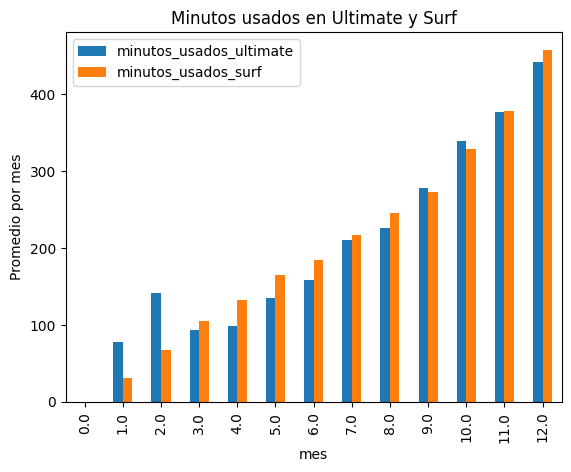

In [38]:
min_us_surf_utimate.plot(kind='bar', x = 'mes', y = ['minutos_usados_ultimate','minutos_usados_surf'], ylabel='Promedio por mes', title = 'Minutos usados en Ultimate y Surf')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Me parece correcto el gráfico, solamente tengo una sugerencia y esta sería no olvidar el título del mismo, pues esto puede hacerlo más legible.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Otra sugerencia que tengo aquí es la de colocar ambos gráficos en uno solo, para tener una mejor comparación de ambos planes. ¿Qué dices?


<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>


Listo! se ve mucho mejor! y se puede observar y comparar de mejor manera. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Totalmente de acuerdo, ahora ya es más facil el comparar los minutos usados. Muy bien!

In [39]:
ultimate_minutos_tot = ultimate_minutos.groupby('mes')['minutos_usados'].sum().reset_index()
surf_minutos_tot = surf_minutos.groupby('mes')['minutos_usados'].sum().reset_index() # Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
print('Minutos tot del plan Ultimate por mes')
print(ultimate_minutos_tot)  
print('Minutos tot del plan Surf por mes')
print(surf_minutos_tot)

Minutos tot del plan Ultimate por mes
     mes  minutos_usados
0    0.0             0.0
1    1.0           774.0
2    2.0          2822.0
3    3.0          3651.0
4    4.0          7074.0
5    5.0         11781.0
6    6.0         17435.0
7    7.0         25197.0
8    8.0         29922.0
9    9.0         37626.0
10  10.0         47778.0
11  11.0         56540.0
12  12.0         69324.0
Minutos tot del plan Surf por mes
     mes  minutos_usados
0    0.0             0.0
1    1.0           406.0
2    2.0          2673.0
3    3.0          7590.0
4    4.0         17577.0
5    5.0         30768.0
6    6.0         41836.0
7    7.0         54448.0
8    8.0         66438.0
9    9.0         80360.0
10  10.0        101846.0
11  11.0        119801.0
12  12.0        150680.0


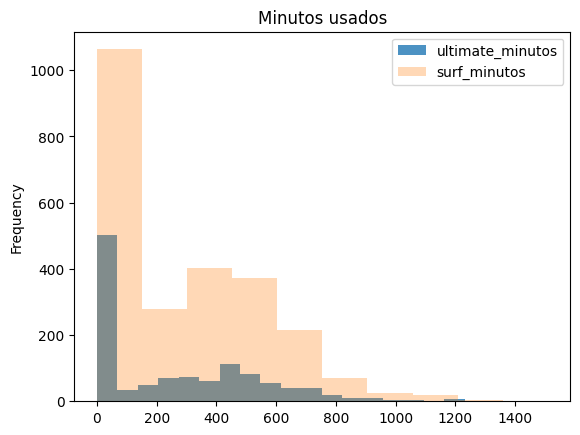

In [65]:
ultimate_minutos['minutos_usados'].plot(kind='hist',
                      bins=20,
                      title='Minutos usados',
                      ylabel='Frequency',alpha = 0.8)

surf_minutos['minutos_usados'].plot(kind='hist',bins=10, alpha=0.3)
plt.legend(['ultimate_minutos','surf_minutos'])
plt.show()

In [74]:
print(surf_minutos.groupby('mes')['minutos_usados'].mean())
print()
print(surf_minutos.groupby('mes')['minutos_usados'].var())# Calcula la media y la varianza de la duración mensual de llamadas.



mes
0.0       0.000000
1.0      31.230769
2.0      66.825000
3.0     105.416667
4.0     133.159091
5.0     164.534759
6.0     184.299559
7.0     216.924303
8.0     245.158672
9.0     272.406780
10.0    329.598706
11.0    377.921136
12.0    457.993921
Name: minutos_usados, dtype: float64

mes
0.0         0.000000
1.0      7131.692308
2.0     26488.968590
3.0     35104.133803
4.0     48327.875260
5.0     63297.465183
6.0     65090.086858
7.0     80040.870247
8.0     72994.808063
9.0     69352.643491
10.0    73167.961817
11.0    63267.781735
12.0    68773.518256
Name: minutos_usados, dtype: float64


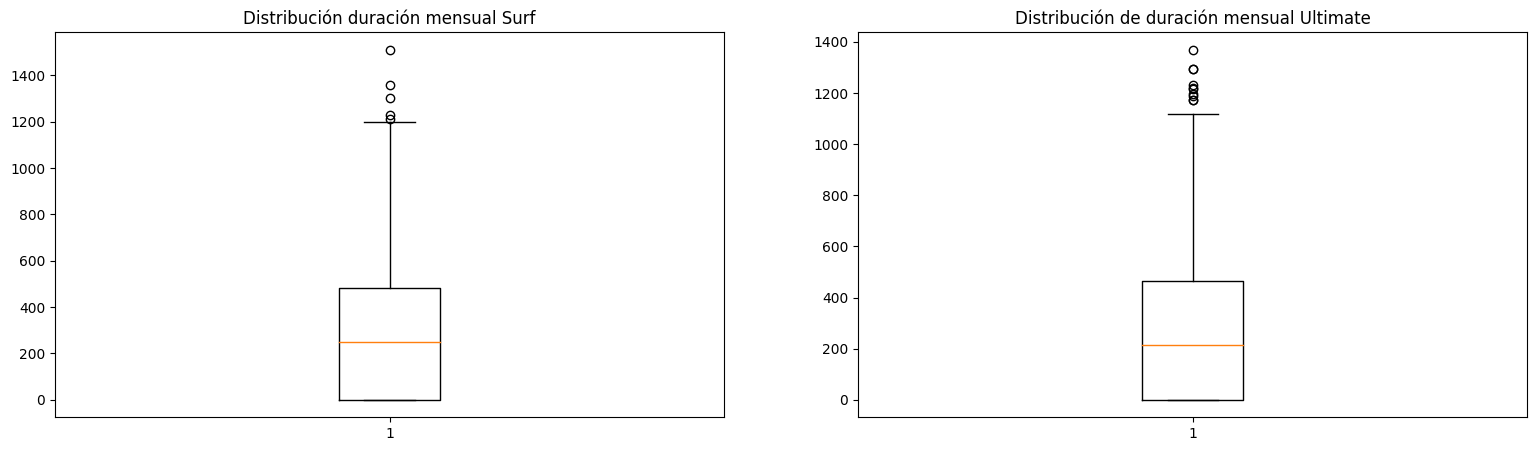

In [96]:
#sns.boxplot(surf_minutos['minutos_usados'])
#plt.show()
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
fig, ax=plt.subplots(1,2, figsize= (19,5))
ax[0].set_title('Distribución duración mensual Surf')
ax[0].boxplot(surf_minutos['minutos_usados'])
ax[1].boxplot(ultimate_minutos['minutos_usados'])
ax[1].set_title('Distribución de duración mensual Ultimate')
plt.show()

Realizamos este analisis despues de unir los DF y crear las variables correspondientes para sacar el ingreso de la compañia en lo que corresponde a los planes telefonicos antes mencionados. 
Podemos observar que la media del numero de llamadas es mayor en el plan Surf y como podemos observar en la grafica, va el numero de llamadas va incrementando el promedio de llamadas conforme a los meses a ecepción del mes de febrero en el plan ultimate que incremento de manera anormal. 
En los hsitogramas observamos que hay más numero de llamadas en el plan Surf y que se disftribuyen de manera muy similar al paso de los meses. 
En los boxplot podemos observar que la media esta entre los 250 aprox y que tenemos en el plan Surf más valoes o consumos atipicos que en el plan Ultimate

### Mensajes

In [98]:
ultimate_mensajes = f_sales.query('plan == "ultimate"')[['numero_de_mensajes','mes']].reset_index(drop=True)
surf_mensajes = f_sales.query('plan == "surf"')[['numero_de_mensajes','mes']].reset_index(drop=True)
    
    
print('ultimate')
print(estadistica(ultimate_mensajes['numero_de_mensajes']))
print()
print('surf')
print(estadistica(surf_mensajes['numero_de_mensajes']))

ultimate
Media
22.97111299915038
Varianza
981.9923621105196
Desviación estandar
31.336757364324082
Moda
0    0.0
dtype: float64
Mediana
12.0
None

surf
Media
20.013883217639854
Varianza
868.4385326677287
Desviación estandar
29.4692811698509
Moda
0    0.0
dtype: float64
Mediana
10.0
None


In [114]:
print('Numero de mensajes enviados por mes en el plan Ultimate')
ult_mens_env = ultimate_mensajes.groupby('mes')['numero_de_mensajes'].sum().reset_index()
print(ult_mens_env)
print('Numero de mensajes enviados por mes en plan Surf')
surf_mens_env = surf_mensajes.groupby('mes')['numero_de_mensajes'].sum().reset_index()
print(surf_mens_env)

Numero de mensajes enviados por mes en el plan Ultimate
     mes  numero_de_mensajes
0    0.0                 0.0
1    1.0                57.0
2    2.0               158.0
3    3.0               447.0
4    4.0               742.0
5    5.0              1204.0
6    6.0              1717.0
7    7.0              2307.0
8    8.0              2822.0
9    9.0              3175.0
10  10.0              4133.0
11  11.0              4625.0
12  12.0              5650.0
Numero de mensajes enviados por mes en plan Surf
     mes  numero_de_mensajes
0    0.0                 0.0
1    1.0                73.0
2    2.0               381.0
3    3.0               581.0
4    4.0              1294.0
5    5.0              2366.0
6    6.0              2951.0
7    7.0              4066.0
8    8.0              4850.0
9    9.0              5686.0
10  10.0              7486.0
11  11.0              8478.0
12  12.0             10802.0


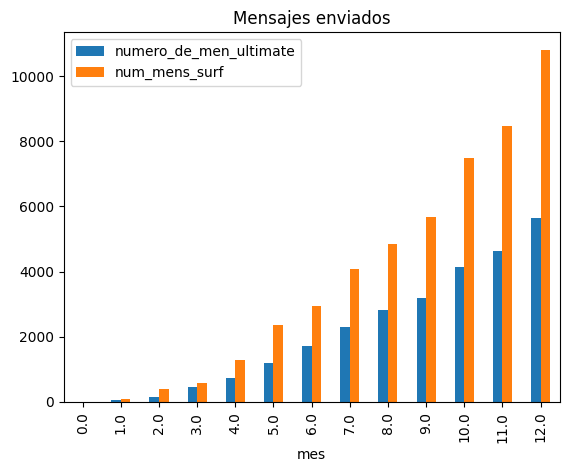

In [117]:
men_env_surf_ult = ult_mens_env.merge(surf_mens_env, on = 'mes')
men_env_surf_ult.columns= ['mes','numero_de_men_ultimate','num_mens_surf']
men_env_surf_ult .plot(kind='bar',x='mes',title='Mensajes enviados', y = ['numero_de_men_ultimate','num_mens_surf'])
plt.show()
#surf_mens_env.plot(kind='bar',x='mes',title='Mensajes Surf')
#plt.show()

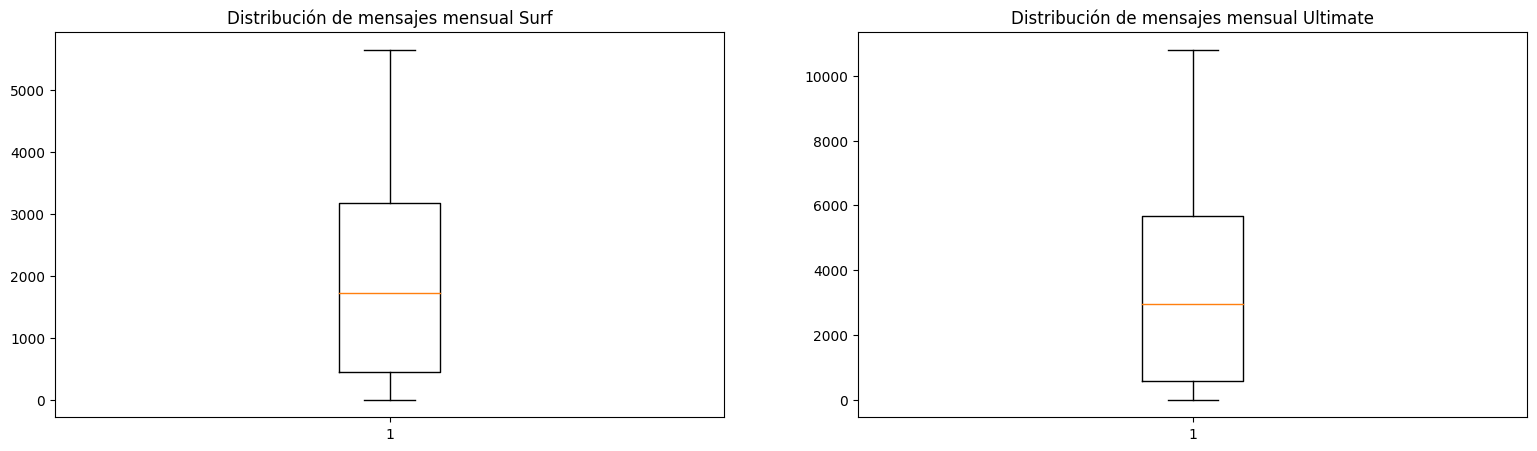

In [118]:
fig, ax=plt.subplots(1,2, figsize= (19,5))
ax[0].set_title('Distribución de mensajes mensual Surf')
ax[0].boxplot(ult_mens_env['numero_de_mensajes'])
ax[1].boxplot(surf_mens_env['numero_de_mensajes'])
ax[1].set_title('Distribución de mensajes mensual Ultimate')
plt.show()

En base a los resultados podemos observar que la media de los mensjaes enviados en el plan Ultimate es un poco mayor que en el Surf. Sin embargo, en el plan Surf se han enviado más mensajes que los que tienen el plan ultimate. Y como observamos en las graficas de barras la cantidad de mensajes va incrementando con respecto a los meses trascurridos. 

### Internet

In [101]:
ultimate_int = f_sales.query('plan == "ultimate"')[['gb_usados','mes']].reset_index(drop=True)
surf_int = f_sales.query('plan == "surf"')[['gb_usados','mes']].reset_index(drop=True)

print('ultimate')
print(estadistica(ultimate_int['gb_usados']))
print()
print('surf')
print(estadistica(surf_int['gb_usados']))

ultimate
Media
10.587085811384878
Varianza
107.17289430640565
Desviación estandar
10.35243422130301
Moda
0    0.0
dtype: float64
Mediana
11.0
None

surf
Media
10.70763576970192
Varianza
103.42265817447165
Desviación estandar
10.16969312095855
Moda
0    0.0
dtype: float64
Mediana
11.0
None


In [119]:
ult_int = ultimate_int.groupby('mes')['gb_usados'].sum().reset_index()
surf_int_us = surf_int.groupby('mes')['gb_usados'].sum().reset_index()
print('GB usados por mes en ultimate')
print(ult_int)
print('GB usados por mes en Surf')
print(surf_int_us)

GB usados por mes en ultimate
     mes  gb_usados
0    0.0        0.0
1    1.0       29.0
2    2.0      121.0
3    3.0      221.0
4    4.0      343.0
5    5.0      489.0
6    6.0      725.0
7    7.0      973.0
8    8.0     1267.0
9    9.0     1463.0
10  10.0     1878.0
11  11.0     2174.0
12  12.0     2778.0
GB usados por mes en Surf
     mes  gb_usados
0    0.0        0.0
1    1.0       10.0
2    2.0      110.0
3    3.0      312.0
4    4.0      611.0
5    5.0     1087.0
6    6.0     1502.0
7    7.0     2042.0
8    8.0     2735.0
9    9.0     3238.0
10  10.0     4126.0
11  11.0     4650.0
12  12.0     5800.0


<AxesSubplot:title={'center':'GB usados'}, xlabel='mes'>

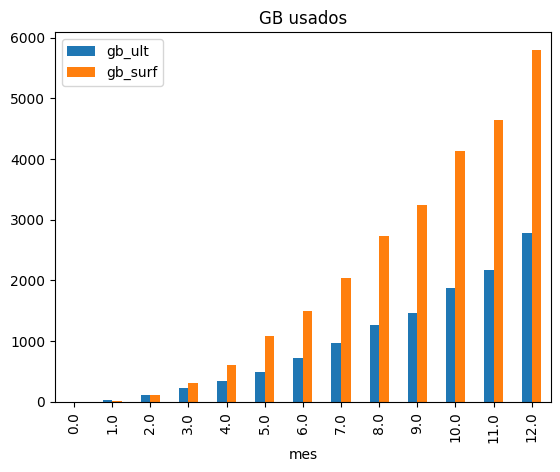

In [123]:
int_surf_ult = ult_int.merge(surf_int_us, on = 'mes')
int_surf_ult.columns = ['mes','gb_ult','gb_surf']
int_surf_ult.plot(kind='bar',x='mes',title='GB usados', y = ['gb_ult','gb_surf'])

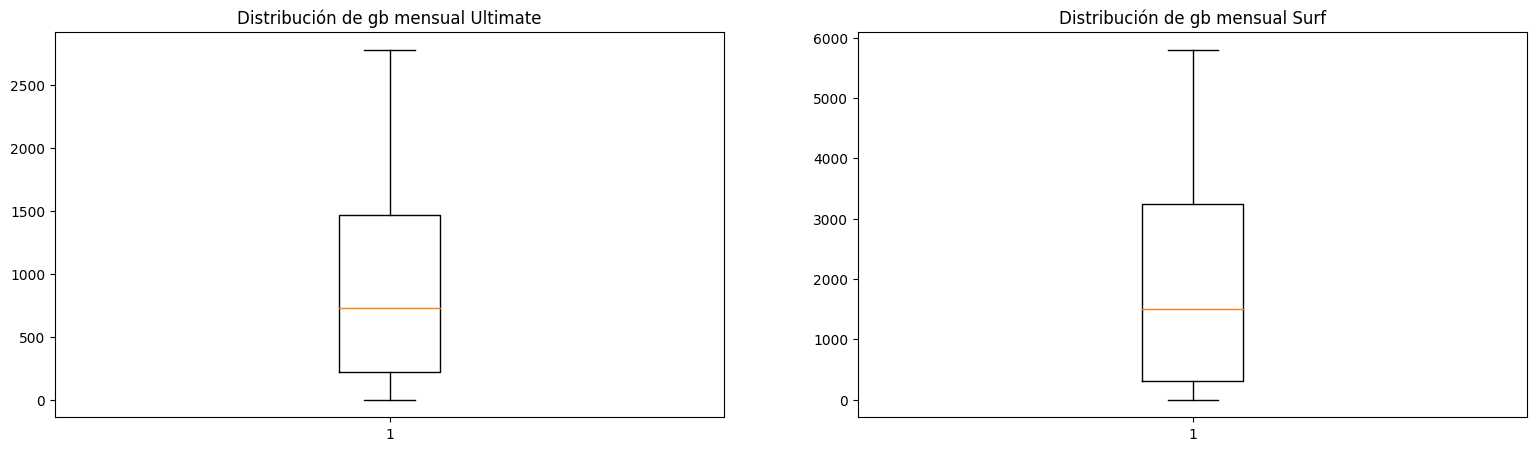

In [124]:
fig, ax=plt.subplots(1,2, figsize= (19,5))
ax[0].set_title('Distribución de gb mensual Ultimate')
ax[0].boxplot(ult_int['gb_usados'])
ax[1].boxplot(surf_int_us['gb_usados'])
ax[1].set_title('Distribución de gb mensual Surf')
plt.show()

Con base en los resultados podemos observar que la media del consumo ocila en los 10.80 gb usados, donde no hay mucha diferencia entre los dos planes. Sin embargo, podemos observar que el consumo de gb en el plan Surf es mucho más grande que el Ultimate. Y terminan pagando consumos extras. 
Y en las graficos podemos observar como va incrementando el consumo a travez de los meses del año. 

## Ingreso

In [104]:
ultimate_ingreso = f_sales.query('plan == "ultimate"')[['ingreso_mensual','mes']].reset_index(drop=True)
surf_ingreso = f_sales.query('plan == "surf"')[['ingreso_mensual','mes']].reset_index(drop=True)

print('ultimate')
print(estadistica(ultimate_ingreso['ingreso_mensual']))
print()
print('surf')
print(estadistica(surf_ingreso['ingreso_mensual']))

ultimate
Media
71.41546304163127
Varianza
80.66142735768904
Desviación estandar
8.981170711977867
Moda
0    70.0
dtype: float64
Mediana
70.0
None

surf
Media
46.12796243364639
Varianza
2344.3250404136206
Desviación estandar
48.41823045520789
Moda
0    20.0
dtype: float64
Mediana
20.0
None


In [105]:
ult_ingre_men = ultimate_ingreso.groupby('mes')['ingreso_mensual'].sum().reset_index()
surf_ingreso = surf_ingreso.groupby('mes')['ingreso_mensual'].sum().reset_index()
print('Ingreso por mes en ultimate')
print(ult_ingre_men)
print('Ingreso por mes en Surf')
print(surf_ingreso)


Ingreso por mes en ultimate
     mes  ingreso_mensual
0    0.0            280.0
1    1.0            700.0
2    2.0           1400.0
3    3.0           2786.0
4    4.0           5103.0
5    5.0           6111.0
6    6.0           7777.0
7    7.0           8512.0
8    8.0           9443.0
9    9.0           9625.0
10  10.0          10115.0
11  11.0          10717.0
12  12.0          11487.0
Ingreso por mes en Surf
     mes  ingreso_mensual
0    0.0           120.00
1    1.0           260.00
2    2.0           929.33
3    3.0          2036.26
4    4.0          3673.52
5    5.0          5862.75
6    6.0          7370.50
7    7.0         10176.42
8    8.0         12523.17
9    9.0         13309.97
10  10.0         16933.97
11  11.0         17096.92
12  12.0         22674.57


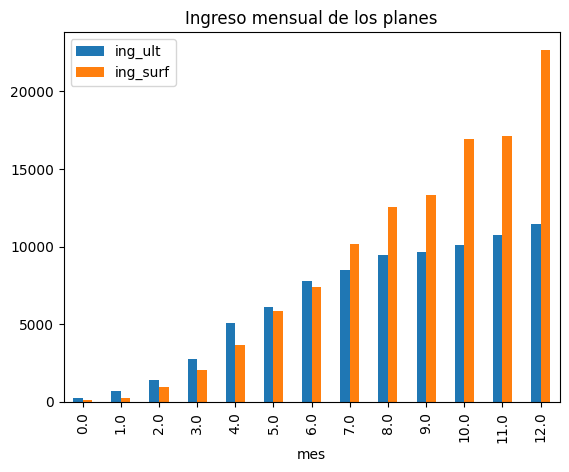

In [126]:
ing_ult_surf = ult_ingre_men.merge(surf_ingreso, on = 'mes')
ing_ult_surf.columns= ['mes','ing_ult','ing_surf']
ing_ult_surf.plot(kind='bar',x='mes',title='Ingreso mensual de los planes', y = ['ing_ult','ing_surf'])
plt.show()


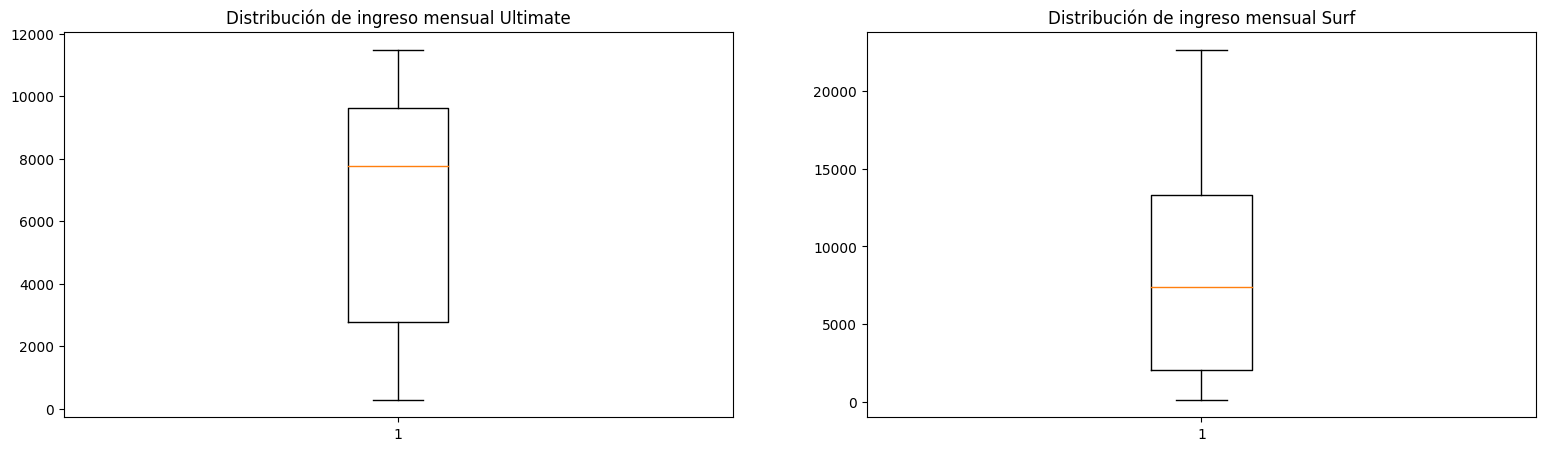

In [127]:
fig, ax=plt.subplots(1,2, figsize= (19,5))
ax[0].set_title('Distribución de ingreso mensual Ultimate')
ax[0].boxplot(ult_ingre_men['ingreso_mensual'])
ax[1].boxplot(surf_ingreso['ingreso_mensual'])
ax[1].set_title('Distribución de ingreso mensual Surf')
plt.show()

Como podemos onbservar en los datos el ingreso del plan Surf es mayor que el Ultimate. Pero esto difiere en la cantidad de usuarios que consumen este plan. De igual manera podemos observar que la media en el ingreso por plan Surf es mayor que el Ultimate. Ahora comprobaremos si en realidad en meyor con las pruebas de hipotesis. 

## Prueba las hipótesis estadísticas


H1:El ingreso de Surf es > que el ingreso de ultimate

H0:El ingreso de Surf no es > que el ingreso de ultimate

In [107]:
ventas_ultimate = f_sales.query('plan == "ultimate"')['ingreso_mensual']
ventas_surf = f_sales.query('plan == "surf"')['ingreso_mensual']# Prueba las hipótesis

In [108]:
hipotesis = st.ttest_ind(ventas_surf,ventas_ultimate, equal_var=False)
alpha = .05

In [109]:
if hipotesis.pvalue < 0.05:
    print('Rechazmos la hipotesis nula')
else:
    print('Aceptamos la hipotesis nula')

Rechazmos la hipotesis nula


H1:El ingreso de NY es != que el ingreso de otras regiones 

H0:El ingreso de NY no es != que el ingreso en otras regiones


In [110]:
ventas_ny = f_sales.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['ingreso_mensual']
ventas_sin_ny = f_sales.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['ingreso_mensual']

In [111]:
hipotesis1 = st.ttest_ind(ventas_ny,ventas_sin_ny, equal_var=False)
alpha = .05

In [112]:
if hipotesis1.pvalue > alpha:
    print('Rechazmos la hipotesis nula')
else:
    print('Aceptamos la hipotesis nula')


Rechazmos la hipotesis nula


## Conclusión general

Con los resultados de este ejercicio, podemos observar ciertos comportamientos en el consumo, en los usuarios y en el ingreso. 

1- Con respecto al consumo, pudimos observar que aunque el plan Ultimate es más grande, los usuarios que contratan el plan Surf en promedio consumen más internet, llamadas y mensajes. 

2- Los usuarios prefieren contratar el plan más barato y pagar el consumo extra, que contratar el plan más caro y tener mayor capacidad de consumo. 

3- En lo que respecta al ingreso, pudimos realizar 2 hipotesis. La primera en la cual con el 95% de confianza, podemos asegurar que el plan Surf es el que tiene mayores ingresos. Y el segundo ejercicio de hipotesis, con el 95% de confianza, podemos asegurar que el ingreso con respecto en el consumo es mayor que el resto de las regiones. 